In [4]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [5]:
load_dotenv()
map_box_api = os.getenv("map_box_api")
px.set_mapbox_access_token(map_box_api)

In [6]:
file_path = Path("covid_master.csv")
covid_master = pd.read_csv(file_path, header=0, index_col=0)
covid_master.head()

date_reported age_group case_status       exposure  gender  \
0   2020/10/26        <20      Active  Close Contact  Female   
1   2020/10/25        <20      Active  Close Contact  Female   
2   2020/10/22      50-59      Active   Not Reported  Female   
3   2020/08/01      20-29   Recovered   Not Reported  Female   
4   2020/10/01      40-49   Recovered   Not Reported  Female   

                              health_region   latitude  longitude province  
0             Haldimand-Norfolk Health Unit  42.854447 -80.178035  Ontario  
1           Durham Region Health Department  44.035150 -78.882498  Ontario  
2  Wellington-Dufferin-Guelph Public Health  43.853642 -80.372085  Ontario  
3        York Region Public Health Services  44.074977 -79.428212  Ontario  
4                        Peel Public Health  43.761613 -79.813571  Ontario

In [7]:
covid_master_cleaned = covid_master.dropna()
covid_master_cleaned.head()

date_reported age_group case_status       exposure  gender  \
0   2020/10/26        <20      Active  Close Contact  Female   
1   2020/10/25        <20      Active  Close Contact  Female   
2   2020/10/22      50-59      Active   Not Reported  Female   
3   2020/08/01      20-29   Recovered   Not Reported  Female   
4   2020/10/01      40-49   Recovered   Not Reported  Female   

                              health_region   latitude  longitude province  
0             Haldimand-Norfolk Health Unit  42.854447 -80.178035  Ontario  
1           Durham Region Health Department  44.035150 -78.882498  Ontario  
2  Wellington-Dufferin-Guelph Public Health  43.853642 -80.372085  Ontario  
3        York Region Public Health Services  44.074977 -79.428212  Ontario  
4                        Peel Public Health  43.761613 -79.813571  Ontario

In [8]:
covid_master_cleaned.to_csv ("covid_master_cleaned.csv")

In [12]:
covid_date = covid_master_cleaned.set_index(pd.to_datetime(covid_master_cleaned["date_reported"], infer_datetime_format=True))
covid_date = covid_date.sort_index()
covid_date.drop(columns={'date_reported'}, inplace=True)
covid_date_sorted = covid_date.groupby('date_reported').count()
covid_date_sorted.head()

KeyboardInterrupt: 

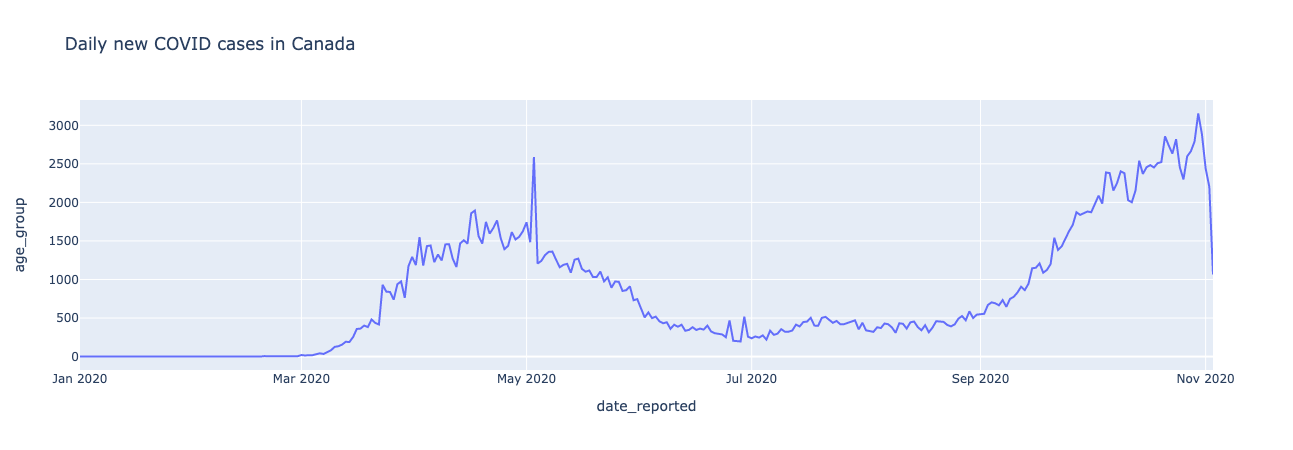

In [13]:
covid_daily_cases = px.line (covid_date_sorted, y="age_group", title="Daily new COVID cases in Canada")
covid_daily_cases

In [14]:
covid_date.head()

age_group case_status        exposure  gender  \
date_reported                                                 
2020-01-01          80+   Recovered    Not Reported    Male   
2020-01-01        50-59   Recovered   Close Contact    Male   
2020-01-10        50-59   Recovered   Close Contact    Male   
2020-01-16        50-59   Recovered    Not Reported  Female   
2020-01-21        50-59   Recovered  Travel-Related    Male   

                                   health_region   latitude  longitude  \
date_reported                                                            
2020-01-01         Haldimand-Norfolk Health Unit  42.854447 -80.178035   
2020-01-01     Region of Waterloo, Public Health  43.462836 -80.538676   
2020-01-10         Haldimand-Norfolk Health Unit  42.854447 -80.178035   
2020-01-16           Eastern Ontario Health Unit  45.273060 -74.952579   
2020-01-21                 Toronto Public Health  43.725845 -79.389558   

              province  
date_reported           
2020-01-01     Ontario  
2020-01-01     Ontario  
2020-01-10     Ontario  
2020-01-16     Ontario  
2020-01-21     Ontario

In [15]:
covid_region = covid_date.reset_index()
covid_region.head()

date_reported age_group case_status        exposure  gender  \
0    2020-01-01       80+   Recovered    Not Reported    Male   
1    2020-01-01     50-59   Recovered   Close Contact    Male   
2    2020-01-10     50-59   Recovered   Close Contact    Male   
3    2020-01-16     50-59   Recovered    Not Reported  Female   
4    2020-01-21     50-59   Recovered  Travel-Related    Male   

                       health_region   latitude  longitude province  
0      Haldimand-Norfolk Health Unit  42.854447 -80.178035  Ontario  
1  Region of Waterloo, Public Health  43.462836 -80.538676  Ontario  
2      Haldimand-Norfolk Health Unit  42.854447 -80.178035  Ontario  
3        Eastern Ontario Health Unit  45.273060 -74.952579  Ontario  
4              Toronto Public Health  43.725845 -79.389558  Ontario

In [16]:
covid_region["count"]= 1
covid_region=covid_region.drop(columns=["age_group", "case_status", "exposure", "province", "gender"])
covid_region.head(5)

date_reported                      health_region   latitude  longitude  \
0    2020-01-01      Haldimand-Norfolk Health Unit  42.854447 -80.178035   
1    2020-01-01  Region of Waterloo, Public Health  43.462836 -80.538676   
2    2020-01-10      Haldimand-Norfolk Health Unit  42.854447 -80.178035   
3    2020-01-16        Eastern Ontario Health Unit  45.273060 -74.952579   
4    2020-01-21              Toronto Public Health  43.725845 -79.389558   

   count  
0      1  
1      1  
2      1  
3      1  
4      1

In [17]:
covid_region = covid_region.groupby(['health_region','latitude','longitude', 'date_reported']).sum().groupby(level=0).cumsum().reset_index()
covid_region.head()

health_region   latitude  longitude date_reported  count
0  Abitibi-Témiscamingue  48.151923 -77.553578    2020-03-23      3
1  Abitibi-Témiscamingue  48.151923 -77.553578    2020-03-24      5
2  Abitibi-Témiscamingue  48.151923 -77.553578    2020-03-26     11
3  Abitibi-Témiscamingue  48.151923 -77.553578    2020-03-27     18
4  Abitibi-Témiscamingue  48.151923 -77.553578    2020-03-28     24

In [18]:
covid_region.sort_values("date_reported", inplace=True)
covid_region.head(50)

health_region   latitude   longitude  \
2899                     Haldimand-Norfolk Health Unit  42.854447  -80.178035   
7907                 Region of Waterloo, Public Health  43.462836  -80.538676   
2900                     Haldimand-Norfolk Health Unit  42.854447  -80.178035   
1744                       Eastern Ontario Health Unit  45.273060  -74.952579   
9450                             Toronto Public Health  43.725845  -79.389558   
9451                             Toronto Public Health  43.725845  -79.389558   
5273                      Middlesex-London Health Unit  42.995716  -81.456983   
7250                                Peel Public Health  43.761613  -79.813571   
3625   Hastings and Prince Edward Counties Health Unit  44.631167  -77.551861   
7251                                Peel Public Health  43.761613  -79.813571   
9709                                 Vancouver Coastal  50.474624 -124.057915   
9452                             Toronto Public Health  43.725845  -79.389558   
7252                                Peel Public Health  43.761613  -79.813571   
10664               York Region Public Health Services  44.074977  -79.428212   
6787                              Ottawa Public Health  45.179578  -75.799952   
3768                                          Interior  50.940525 -119.736219   
9453                             Toronto Public Health  43.725845  -79.389558   
9454                             Toronto Public Health  43.725845  -79.389558   
9455                             Toronto Public Health  43.725845  -79.389558   
7253                                Peel Public Health  43.761613  -79.813571   
10665               York Region Public Health Services  44.074977  -79.428212   
10666               York Region Public Health Services  44.074977  -79.428212   
6788                              Ottawa Public Health  45.179578  -75.799952   
9456                             Toronto Public Health  43.725845  -79.389558   
2433                                            Fraser  49.505234 -122.004814   
10060         Wellington-Dufferin-Guelph Public Health  43.853642  -80.372085   
3390                   Hamilton Public Health Services  43.253243  -79.958463   
2434                                            Fraser  49.505234 -122.004814   
9457                             Toronto Public Health  43.725845  -79.389558   
6789                              Ottawa Public Health  45.179578  -75.799952   
10667               York Region Public Health Services  44.074977  -79.428212   
10668               York Region Public Health Services  44.074977  -79.428212   
6790                              Ottawa Public Health  45.179578  -75.799952   
7908                 Region of Waterloo, Public Health  43.462836  -80.538676   
10270                 Windsor-Essex County Health Unit  42.156423  -82.777533   
7254                                Peel Public Health  43.761613  -79.813571   
6791                              Ottawa Public Health  45.179578  -75.799952   
9458                             Toronto Public Health  43.725845  -79.389558   
1466                   Durham Region Health Department  44.035150  -78.882498   
1745                       Eastern Ontario Health Unit  45.273060  -74.952579   
7255                                Peel Public Health  43.761613  -79.813571   
10669               York Region Public Health Services  44.074977  -79.428212   
9459                             Toronto Public Health  43.725845  -79.389558   
1467                   Durham Region Health Department  44.035150  -78.882498   
7504                        Peterborough Public Health  44.536677  -78.212332   
9710                                 Vancouver Coastal  50.474624 -124.057915   
5490                                          Montréal  45.542072  -73.605668   
10670               York Region Public Health Services  44.074977  -79.428212   
9711                                 Vancouver Coastal  50.474624 -124.0

In [13]:
covid_region.to_csv("covid_mapbox.csv")

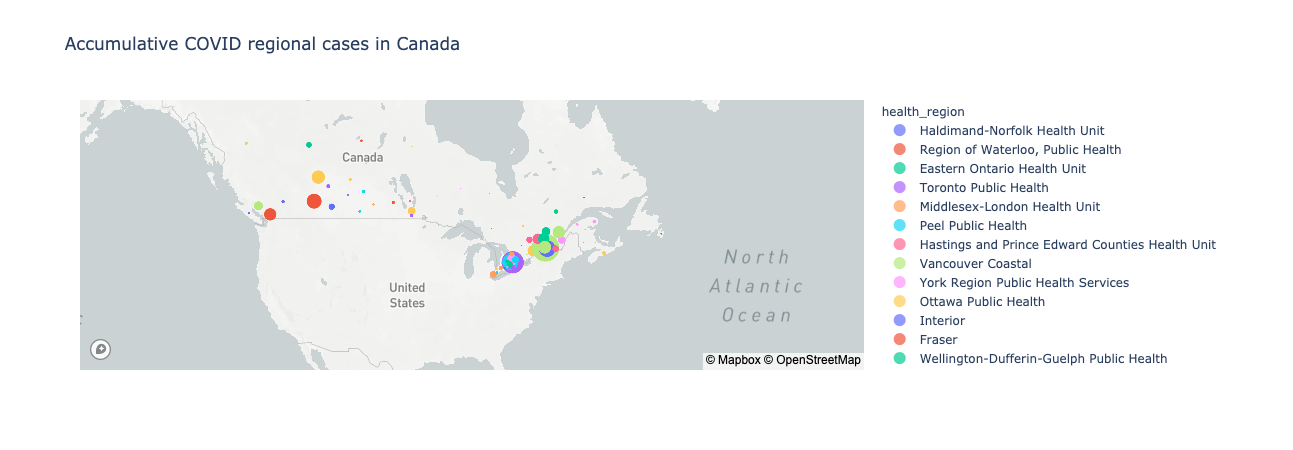

In [14]:
map=px.scatter_mapbox(
    covid_region,
    lat="latitude",
    lon="longitude",
    size="count",
    color="health_region",
    title="Accumulative COVID regional cases in Canada",
    zoom=2
)

# Display the map
map.show()

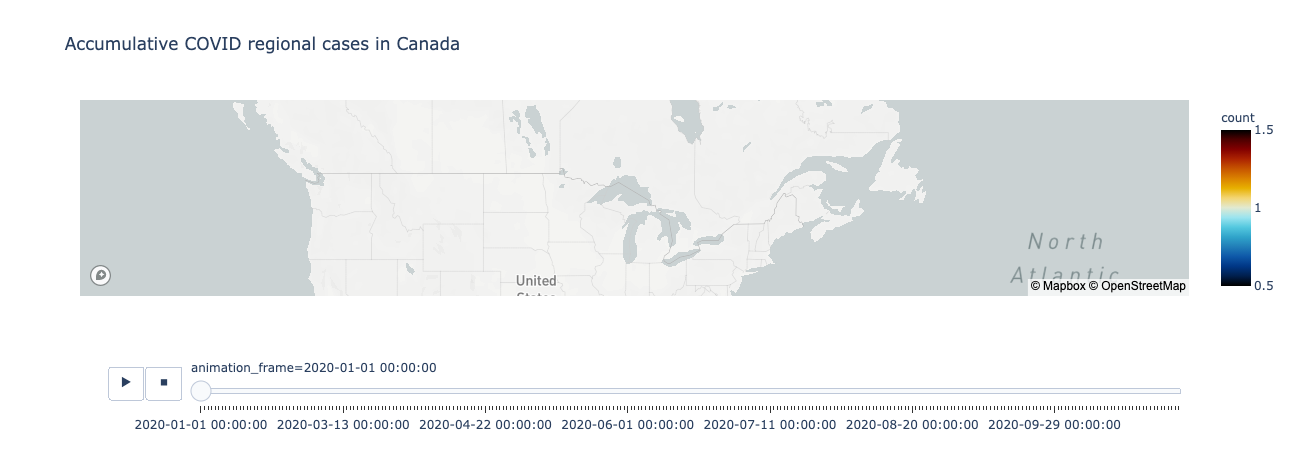

In [15]:
covid_region_new = covid_region ['date_reported'].apply(str)
fig = px.scatter_mapbox(covid_region, lat="latitude", lon="longitude", animation_frame = covid_region_new, animation_group = 'health_region', 
                        color="count", size="count", color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=20, zoom=2.6, hover_name='health_region', hover_data = ['count'], 
                        title = 'Accumulative COVID regional cases in Canada')
fig.show()